# Задание

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.

Признаки:
1. satisfaction_level​- Уровень удовлетворенности работой
2. Last_evaluation -​ Время с момента последней оценки в годах
3. number_projects​- Количество проектов, выполненных за время работы
4. average_monthly_hours​- Среднее количество часов на рабочем месте в месяц
5. time_spend_company​- Стаж работы в компании в годах
6. work_accident​- Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left​- уволился ли сотрудник
8. promotion_last_5years​- повышался ли сотрудник за последние пять лет
9. department -​ отдел в котором работает сотрудник
10. salary​- относительный уровень зарплаты

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

## Задание 1
Загрузите файл HR.csv в pandas dataframe

In [2]:
main_df = pd.read_csv('HR.csv')
main_df.info()
main_df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  

In [3]:
main_df.head(10)
#main_df.isna().sum()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Задание 2
Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [4]:
main_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
main_df.mean(numeric_only=True) #среднее

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [6]:
main_df.median(numeric_only=True) #медиана

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [7]:
main_df.mode(numeric_only=True) #мода

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN


In [8]:
main_df.min(numeric_only=True) #минимум

satisfaction_level        0.09
last_evaluation           0.36
number_project            2.00
average_montly_hours     96.00
time_spend_company        2.00
Work_accident             0.00
left                      0.00
promotion_last_5years     0.00
dtype: float64

In [9]:
main_df.max(numeric_only=True) #максимум

satisfaction_level         1.0
last_evaluation            1.0
number_project             7.0
average_montly_hours     310.0
time_spend_company        10.0
Work_accident              1.0
left                       1.0
promotion_last_5years      1.0
dtype: float64

In [10]:
main_df.std(numeric_only=True) #стандартное отклонение

satisfaction_level        0.248631
last_evaluation           0.171169
number_project            1.232592
average_montly_hours     49.943099
time_spend_company        1.460136
Work_accident             0.351719
left                      0.425924
promotion_last_5years     0.144281
dtype: float64

## Задание 3
Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [11]:
corr = main_df.corr(numeric_only=True)
corr.style.background_gradient(cmap='RdYlGn')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<Axes: >

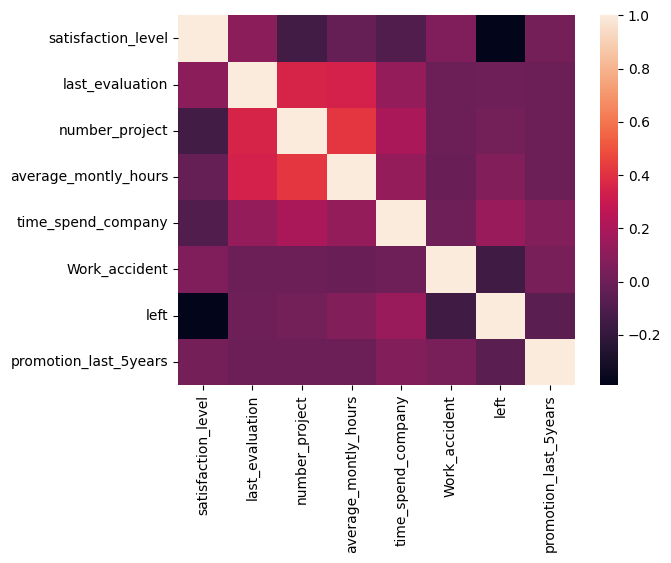

In [12]:
sns.heatmap(corr) # построение тепловой карты с помощью библиотеки seaborn

In [13]:
corr1 = corr.unstack().sort_values()
corr1[corr1 == corr1.min()] #минимальная пара

left                satisfaction_level   -0.388375
satisfaction_level  left                 -0.388375
dtype: float64

In [14]:
corr2 = corr1[corr1 < 1.0]
corr2[corr2 == corr2.max()] #максимальная пара

average_montly_hours  number_project          0.417211
number_project        average_montly_hours    0.417211
dtype: float64

## Задание 4
Рассчитайте сколько сотрудников работает в каждом департаменте.

In [15]:
main_df['department'][main_df['left'] ==0].value_counts() #только работающие сейчас сотрудники

department
sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: count, dtype: int64

## Задание 5
Показать распределение сотрудников по зарплатам.

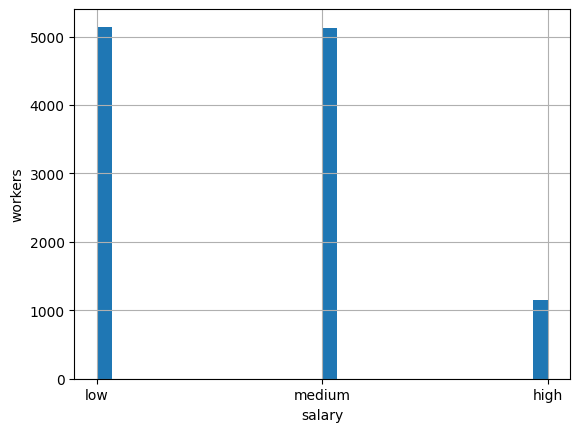

In [16]:
main_df['salary'][main_df['left'] == 0].hist(bins=30) #только работающие сотрудники
plt.xlabel('salary')
plt.ylabel('workers')
plt.show()

## Задание 6
Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

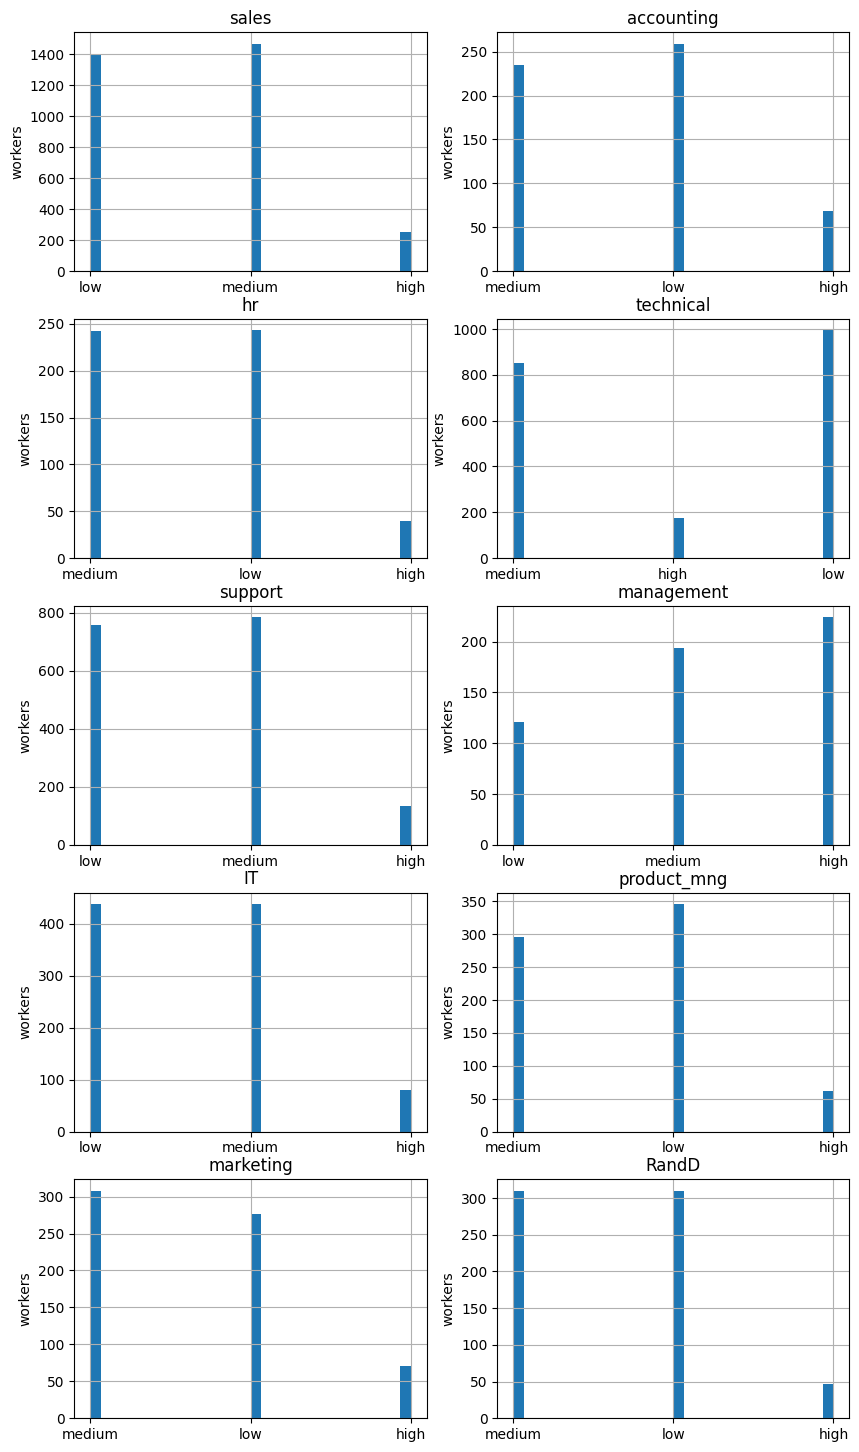

In [17]:
plt.figure(figsize=(10,18))
j = 1
for department in main_df['department'].unique():
    plt.subplot(5,2,j)
    main_df['salary'][(main_df['left'] == 0) & (main_df['department'] == department)].hist(bins=30)
    plt.title(department)
    #plt.xlabel('salary')
    plt.ylabel('workers')
    j += 1
plt.show()

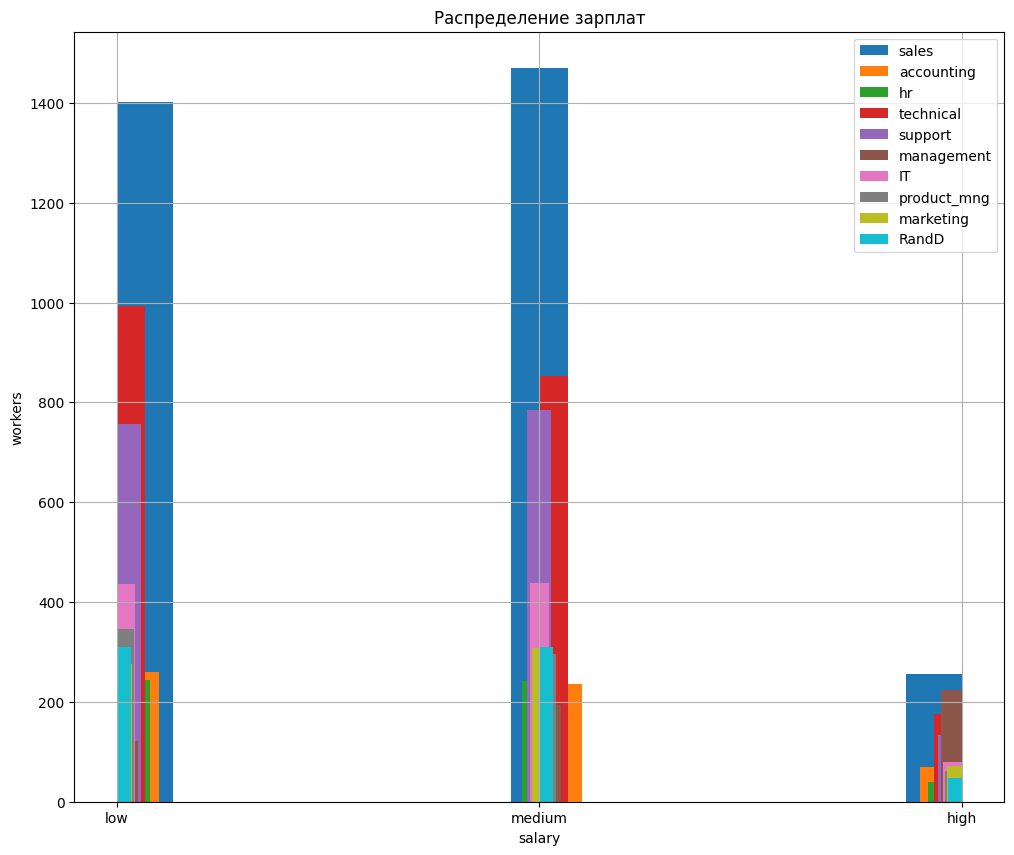

In [18]:
plt.figure(figsize=(12,10))
j = 1
for department in main_df['department'].unique():
    main_df['salary'][(main_df['left'] == 0) & (main_df['department'] == department)].hist(bins=(10 + j*5))
    plt.title('Распределение зарплат')
    plt.xlabel('salary')
    plt.ylabel('workers')
    j += 1
plt.legend(main_df['department'].unique())
plt.show()

## Задание 7
Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [19]:
# H0 - сотрудники проводят примерно одинаково времени на работе
# H1 - сотрудники с высоким окладом проводят на работе больше времени
#print(main_df[main_df['salary'] == 'high']['average_montly_hours'].count()) #1237 выборок
#print(main_df[main_df['salary'] == 'low']['average_montly_hours'].count()) #7316 выборок
high_salary = main_df[main_df['salary'] == 'high']['average_montly_hours'].values
low1 = main_df[main_df['salary'] == 'low'].reset_index()
low1.head(100)
low1 = low1['average_montly_hours'].groupby(np.arange(len(low1.index))//5, axis=0).mean()
# усреднили группами по 5 значений? так как их много
print(low1.mean())
print(main_df[main_df['salary'] == 'low']['average_montly_hours'].values.mean())
# среднее близко
print(main_df[main_df['salary'] == 'high']['average_montly_hours'].values.mean())
low_salary = low1.iloc[0:1237].values # сравняли выборки
p = stats.ttest_ind(high_salary, low_salary, equal_var = True)
print(p)
if p[1] < 0.05:
    print("Отклоняем нулевую гипотезу")
else:
    print("Не отклоняем нулевую гипотезу")

200.97308743169398
200.9965828321487
199.86742118027485
Ttest_indResult(statistic=-0.6864556719745556, pvalue=0.4924901903070886)
Не отклоняем нулевую гипотезу


## Задание 8
Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов

In [20]:
working = main_df[main_df['left'] == 0]
lefted = main_df[main_df['left'] == 1]

In [21]:
print('Для работающих сотрудников')
print(f"Доля сотрудников с повышением за последние 5 лет: {working[working['promotion_last_5years'] == 1]['promotion_last_5years'].count() / working['promotion_last_5years'].count() *100:.3f}%")
print(f"Средняя степень удовлетворенности: {working['satisfaction_level'].mean():.2f}")
print(f"Среднее количество проектов: {working['number_project'].mean():.2f}")


Для работающих сотрудников
Доля сотрудников с повышением за последние 5 лет: 2.625%
Средняя степень удовлетворенности: 0.67
Среднее количество проектов: 3.79


In [22]:
print('Для бывших сотрудников')
print(f"Доля сотрудников с повышением за последние 5 лет: {lefted[lefted['promotion_last_5years'] == 1]['promotion_last_5years'].count() / working['promotion_last_5years'].count() *100:.3f}%")
print(f"Средняя степень удовлетворенности: {lefted['satisfaction_level'].mean():.2f}")
print(f"Среднее количество проектов: {lefted['number_project'].mean():.2f}")

Для бывших сотрудников
Доля сотрудников с повышением за последние 5 лет: 0.166%
Средняя степень удовлетворенности: 0.44
Среднее количество проектов: 3.86


## Задание 9
Разделить данные на тестовую и обучающую выборки Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
Оценить качество модели на тестовой выборки

In [23]:
X = main_df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = main_df['left'].values
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=2/3, random_state=0)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)


LinearDiscriminantAnalysis()

In [24]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
accuracy_score(y_test, lda.predict(X_test))

0.7622

Ни изменение тестовой выборки, ни подмешивание случайных значений существенно не изменяют результат, который с учетом человеческого фактора довольно высок


## Задание 10
Загрузить jupyter notebook с решение на github и прислать ссылку